# Importing Libraries and Data

In [1]:
from collections import Counter
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Giova\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Giova\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Giova\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Giova\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
# Importing text file
centuryArticle = r'D:\Data_Analysis\13-11-2025_Network_Visualization\03.Scripts\20th-century\20th_century_article.txt'
with open(centuryArticle, 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

# Tokenization with TextBlob compared to NLTK

In [3]:
# Word Tokenization using TextBlob
blobVersion = TextBlob(data)

In [4]:
from nltk.probability import FreqDist
wordDist = FreqDist(blobVersion.words)
print(wordDist)

<FreqDist with 4089 samples and 15014 outcomes>


In [5]:
wordDist.most_common(10)

[('the', 1082),
 ('of', 589),
 ('and', 394),
 ('to', 320),
 ('The', 302),
 ('in', 289),
 ('December', 225),
 ('Retrieved', 208),
 ('a', 185),
 ('was', 135)]

In [6]:
# Word Tokenization using NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
tokenized_words = word_tokenize(data)
word_Dist = FreqDist(tokenized_words)
print(word_Dist)

<FreqDist with 4124 samples and 19789 outcomes>


In [7]:
df_words = pd.DataFrame(tokenized_words)
df_words = df_words.value_counts().reset_index()
df_words.columns = ['Words', 'Word Count']
df_words.head(10)

,Words,Word Count
0,.,1614
1,the,1082
2,",",966
3,of,589
4,and,394
5,to,320
6,The,302
7,``,300
8,in,289
9,],275


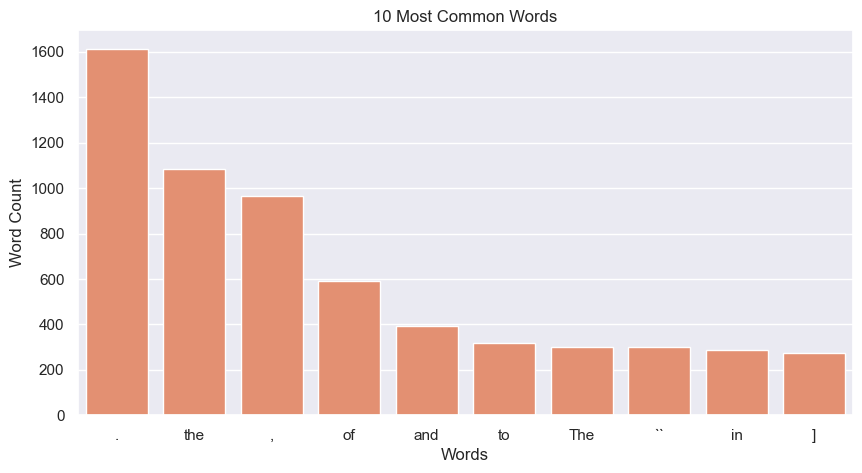

In [8]:
plt.figure(figsize=(10, 5))
with sns.color_palette('flare'):
    sns.barplot(data=df_words.nlargest(10, 'Word Count'), x='Words',
                y='Word Count', saturation=0.9).set_title('10 Most Common Words')
plt.show()

Many punctuation marks and prepositions are appearing in our results. The next step is to remove these with stopwords.

## Filtering out Stopwords

In [9]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in tokenized_words if word not in stop_words]
filtered_words[:10]

['The',
 'th',
 'century',
 'changed',
 'world',
 'unprecedented',
 'ways',
 '.',
 'The',
 'World']

In [10]:
punct_words = re.sub("[^a-zA-Z]", " ", str(filtered_words))
no_punct_words = word_tokenize(punct_words)
no_punct_words[:10]

['The',
 'th',
 'century',
 'changed',
 'world',
 'unprecedented',
 'ways',
 'The',
 'World',
 'Wars']

In [11]:
df_filered_words = pd.DataFrame(no_punct_words)
df_filered_words = df_filered_words.value_counts().reset_index()
df_filered_words.columns = ['Words', 'Word Count']
df_filered_words.head(10)

,Words,Word Count
0,The,302
1,December,225
2,Retrieved,208
3,War,108
4,war,80
5,s,76
6,World,67
7,Soviet,62
8,Hitler,51
9,ISBN,40


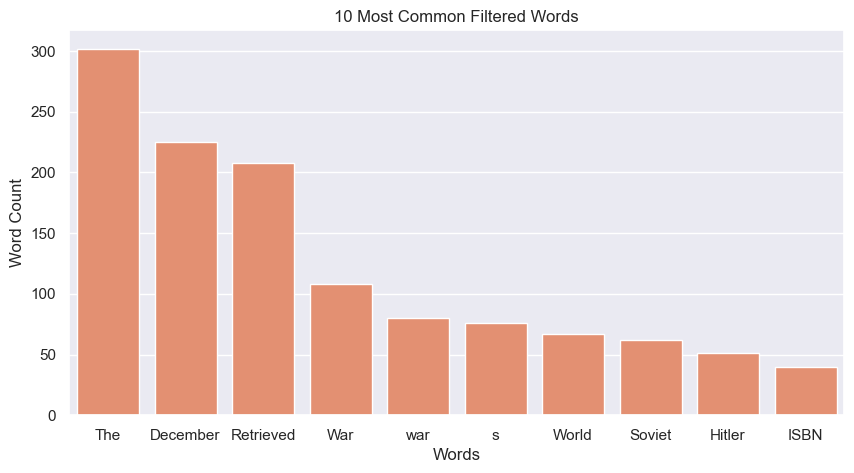

In [12]:
plt.figure(figsize=(10, 5))
with sns.color_palette('flare'):
    sns.barplot(data=df_filered_words.head(10), x='Words',
                y='Word Count', saturation=0.9).set_title('10 Most Common Filtered Words')
plt.show()

The filtered words reveal that there are still words appearing that provide little semantic value on the actual events of the 20th century. Retrieved and December appear mostly due to the article sources referenced at the end of this article. War, world, soviet and Hitler are the most mentioned which also confirms most of the events described in the article relate to these.

# POS Tags with TextBlob

In [13]:
new_stopwords = ['And', 'Then', 'n', 't', 's', 'The', 'th', 'Retrieved', 'December', 'WikipediaJump', 'menuMain', 'menuMore', 'sidebarhide', 'contentMain', 'pageContentsCurrent', 'WikipediaContact', 'articleAbout', 'menumove',
                 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pagesSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'account', 'Log', 'inContentsmove', 'centuryToggle']
filtered = [word for word in no_punct_words if word not in new_stopwords]
filtered[:10]

['century',
 'changed',
 'world',
 'unprecedented',
 'ways',
 'World',
 'Wars',
 'sparked',
 'tension',
 'countries']

In [14]:
nltk.download('averaged_perceptron_tagger_eng')
text = TextBlob(str(filtered))
tags_list = text.tags
tags_list[:10]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Giova\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('[', 'JJ'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'changed", 'VBD'),
 ("'world", 'NNP'),
 ("'", 'POS'),
 ("'unprecedented", 'VBD'),
 ("'ways", 'NNS'),
 ("'", 'POS'),
 ("'World", 'NNP')]

In [15]:
df_POS_tags = pd.DataFrame(tags_list)
df_POS_tags.columns = ['Words', 'Word Type']
df_POS_tags.head(10)

,Words,Word Type
0,[,JJ
1,'century,NNP
2,',POS
3,'changed,VBD
4,'world,NNP
5,',POS
6,'unprecedented,VBD
7,'ways,NNS
8,',POS
9,'World,NNP


In [16]:
df_tags = df_POS_tags.groupby('Word Type').count().reset_index()
df_tags.nlargest(10, 'Words')

,Word Type,Words
13,POS,6271
11,NNP,5037
12,NNS,985
16,VBD,639
10,NN,360
17,VBG,312
6,JJ,280
15,RB,146
5,IN,145
1,CD,74


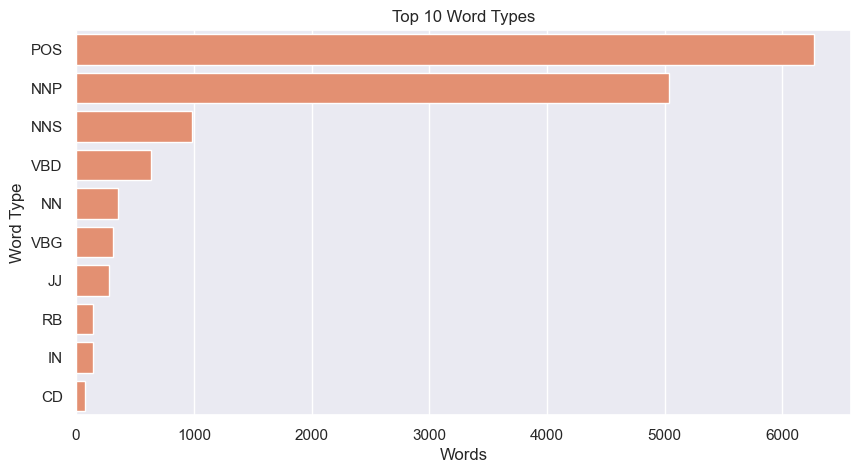

In [17]:
plt.figure(figsize=(10, 5))
with sns.color_palette('flare'):
    sns.barplot(data=df_tags.nlargest(10, 'Words'), x='Words',
                y='Word Type', saturation=0.9).set_title('Top 10 Word Types')
plt.show()

## Nouns

In [18]:
df_nouns = df_POS_tags[(df_POS_tags['Word Type'] == 'NN') | (
    df_POS_tags['Word Type'] == 'NNS') | (df_POS_tags['Word Type'] == 'NNP') | (df_POS_tags['Word Type'] == 'NNPS')]
df_nouns.columns = ['Word', 'Occurences']
nouns = df_nouns.groupby('Word').count().reset_index()
noun_occurence = nouns.sort_values(by=['Occurences'], ascending=False)
noun_occurence.head(15)

,Word,Occurences
1245,'War,108
2504,'war,80
1287,'World,67
1096,'Soviet,62
527,'Hitler,51
550,'ISBN,40
526,'History,40
1736,'first,37
2528,'world,34
1059,'September,32


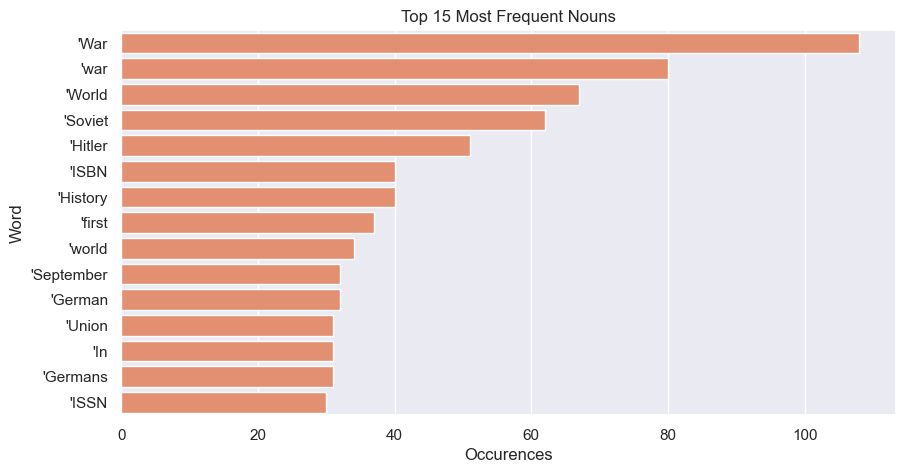

In [19]:
plt.figure(figsize=(10, 5))
with sns.color_palette('flare'):
    sns.barplot(data=noun_occurence.nlargest(15, 'Occurences'), y='Word',
                x='Occurences', saturation=0.9).set_title('Top 15 Most Frequent Nouns')
plt.show()

Most of the nouns with highest mentions relate to war, world, soviet and Hilter which indicate the information shared related to the conflict that took place in Europe. The nouns that are of little relevance to the events described in the article include history and edit. 

## Verbs

In [20]:
df_verbs = df_POS_tags[(df_POS_tags['Word Type'] == 'VBD') | (
    df_POS_tags['Word Type'] == 'VBG') | (df_POS_tags['Word Type'] == 'VB')]
df_verbs.columns = ['Word', 'Occurences']
verbs = df_verbs.groupby('Word').count().reset_index()
verb_occurence = verbs.sort_values(by=['Occurences'], ascending=False)
verb_occurence.head(15)

,Word,Occurences
73,'United,31
0,'Allied,17
323,'led,15
1,'Archived,14
509,'used,13
319,'launched,12
288,'including,10
161,'controlled,9
259,'forced,8
320,'leading,8


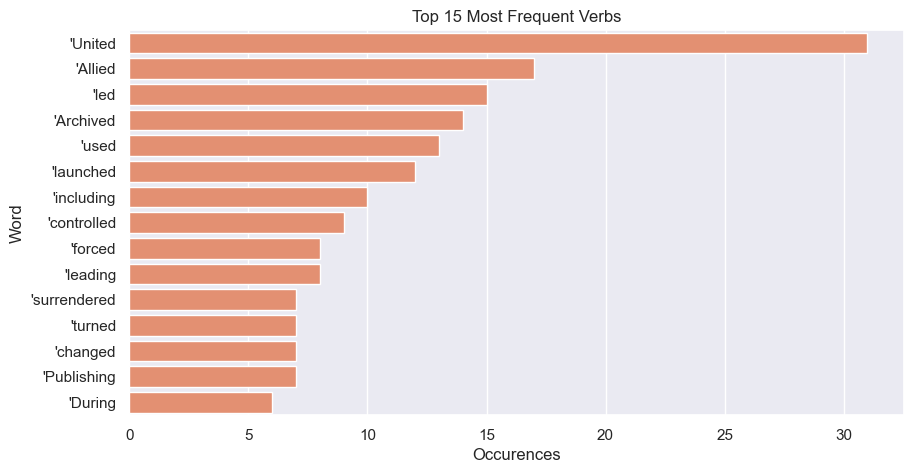

In [21]:
plt.figure(figsize=(10, 5))
with sns.color_palette('flare'):
    sns.barplot(data=verb_occurence.nlargest(15, 'Occurences'), y='Word',
                x='Occurences', saturation=0.9).set_title('Top 15 Most Frequent Verbs')
plt.show()

The verbs that don't relate much to the events described in the article include archived and publishing. The most prominent verbs reveal that most of the events of the article focused on control strategies carried out both on an offensive and defensive manner.

## Adjectives

In [22]:
df_adj = df_POS_tags[(df_POS_tags['Word Type'] == 'JJ') | (
    df_POS_tags['Word Type'] == 'JJR') | (df_POS_tags['Word Type'] == 'JJS')]
df_adj.columns = ['Word', 'Occurences']
adjectives = df_adj.groupby('Word').count().reset_index()
adj_occurence = adjectives.sort_values(by=['Occurences'], ascending=False)
adj_occurence.head(15)

,Word,Occurences
33,'Japanese,33
2,'American,24
4,'Atlantic,13
24,'Guardian,10
129,'power,9
110,'largest,9
67,'West,8
31,'Interest,7
17,'Chinese,7
1,'African,6


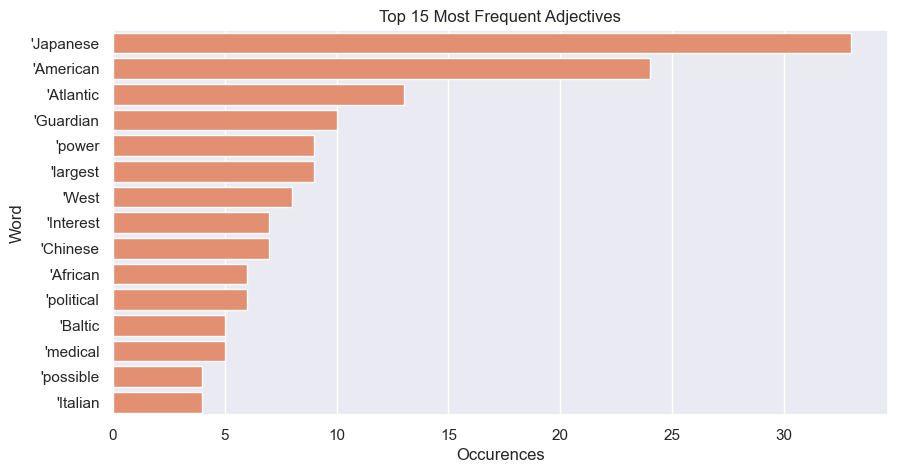

In [23]:
plt.figure(figsize=(10, 5))
with sns.color_palette('flare'):
    sns.barplot(data=adj_occurence.nlargest(15, 'Occurences'), y='Word',
                x='Occurences', saturation=0.9).set_title('Top 15 Most Frequent Adjectives')
plt.show()

The adjectives with highest mentions reveal the events described in the article focused on geographical control political interest among world leading nations. Guardian is the only adjective that seems to not be related to the article theme.

# Country Occurences

In [24]:
country_data = pd.read_csv('20th_century_countries.csv', index_col=0)
country_data.head()

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola


In [25]:
# Cleaning country list
country_list = country_data['country_name'].str.strip().to_list()
country_list[:10]

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria']

In [26]:
article_string = ' '.join([str(term) for term in filtered])
print(article_string)

century changed world unprecedented ways World Wars sparked tension countries led creation atomic bombs Cold War led Space Race creation space based rockets World Wide Web created These advancements played significant role citizens lives shaped st century today new beginning century marked significant changes saw decade herald series inventions including automobile airplane radio broadcasting saw completion Panama Canal Scramble Africa continued resulted wars genocide across continent atrocities Congo Free State shocked civilized world From First World War aftermath caused major changes power balance world destroying transforming powerful empires First World War simply WWI termed Great War contemporaries started July ended November war precipitated Assassination Sarajevo Austro Hungarian Empire heir throne Erzherzog Franz Ferdinand Gavrilo Princip member Young Bosnia liberation movement After period diplomatic military escalation known July Crisis end July two coalitions war Allies com

In [27]:
country_dict = {country: len(re.findall(rf'\b{re.escape(country)}\b', article_string)) for country in country_list}
country_dict

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 4,
 'Azerbaijan': 0,
 'Bahamas, The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 1,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Cape Verde': 1,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 "China, People's Republic of": 0,
 'Colombia': 0,
 'Comoros': 0,
 'Congo, Democratic Republic of the': 0,
 'Congo, Republic of the': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 

In [28]:
dct = {v: [k] for v, k in country_dict.items()}
df_country = pd.DataFrame(dct).T.reset_index()
df_country

,index,0
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [29]:
df_country.rename(columns={'index': 'Country', 0: 'Times Mentioned'}, inplace=True)
df_country.shape

(208, 2)

## Country Occurence Plot

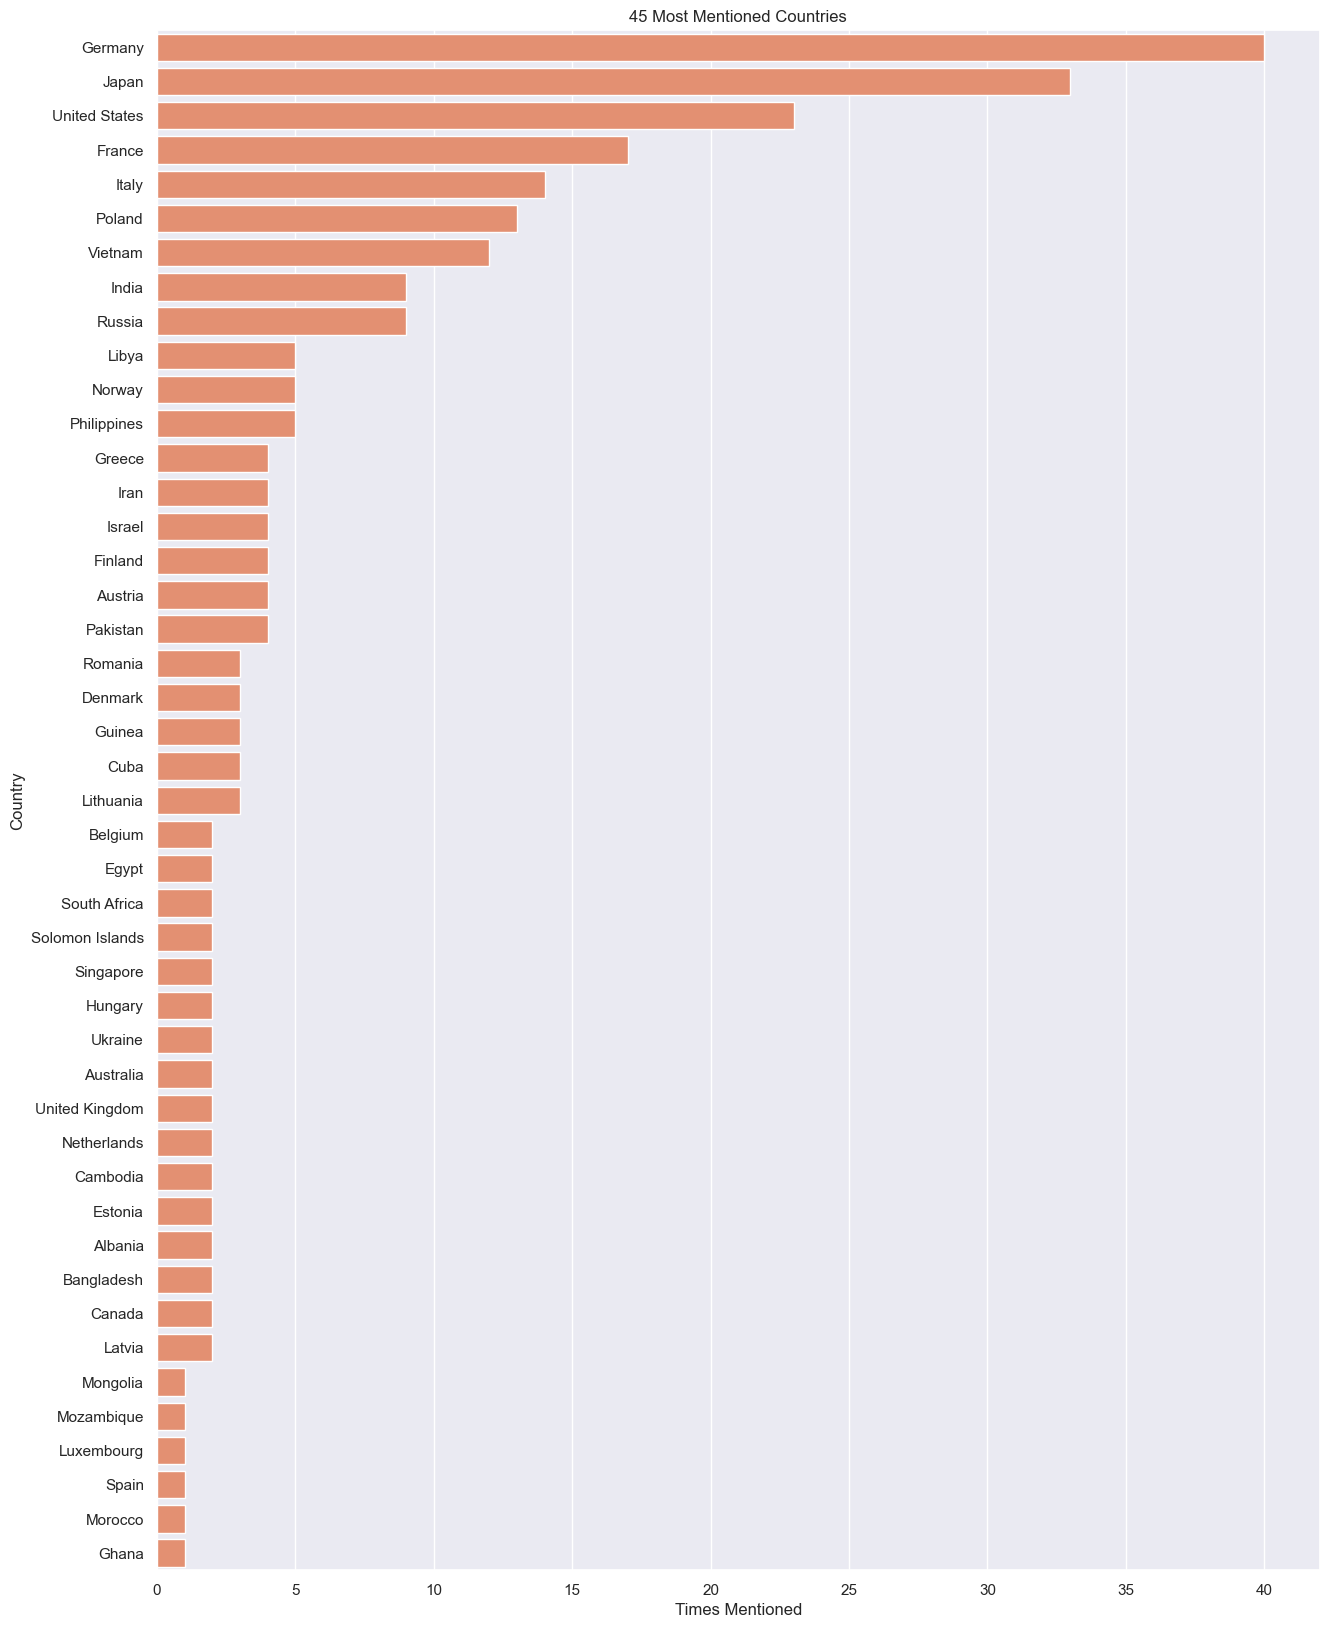

In [30]:
plt.figure(figsize=(15, 20))
with sns.color_palette('flare'):
    sns.barplot(data=df_country.sort_values(by='Times Mentioned', ascending=False).head(45), x='Times Mentioned',
                y='Country', saturation=0.9).set_title('45 Most Mentioned Countries')
plt.show()

Germany and Japan were the most mentioned countries in the article as these were the main antagonists per the events described in the article. All of the other events focused on the United States, Europe, Russia and India.

# Sentiment Analysis

My expectations of sentiment analysis are that the words used to describe the events were overall objective with a positive sentiment based on the endings given for each event described.

In [31]:
article_sent = TextBlob(str(filtered))
sentiment = article_sent.sentiment
sentiment

Sentiment(polarity=0.04809338472825603, subjectivity=0.3538926726925834)

In [32]:
df_sentiment = pd.DataFrame(sentiment)
df_sentiment.index = ['Polarity', 'Subjectivity']
df_sentiment.columns = ['Score']
df_sentiment

,Score
Polarity,0.048093
Subjectivity,0.353893


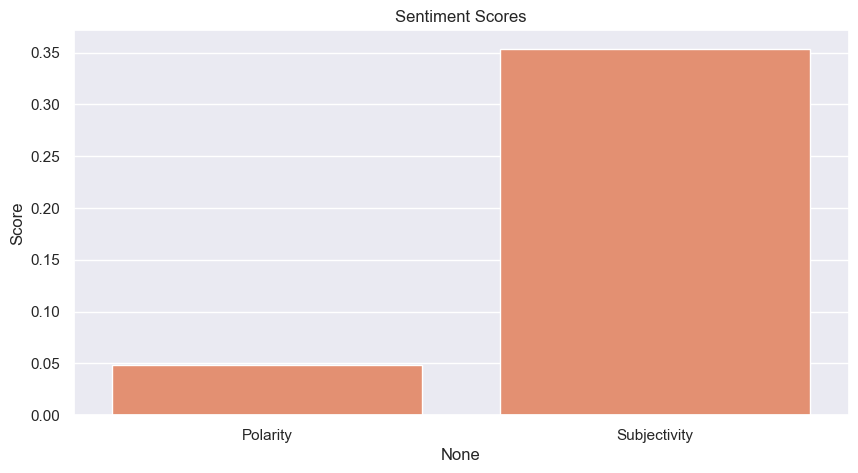

In [33]:
plt.figure(figsize=(10, 5))
with sns.color_palette('flare'):
    sns.barplot(data=df_sentiment, x=df_sentiment.index,
                y=df_sentiment['Score'], saturation=0.9).set_title('Sentiment Scores')
plt.show()

The text results seem to confirm my expectations, even though the subjectivity seems more factual than expected. The positive subjectivity result indicates this article is considered factual with an overall positive sentiment based on the polarity score. It is logical for algorithms to consider it to this level based on the type of words used.